## Hierarchical clustering

In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
crime = pd.read_csv("crime_data.csv")

In [3]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crime_df = scaler.fit_transform(crime.iloc[:,1:])

In [5]:
scaled_crime_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

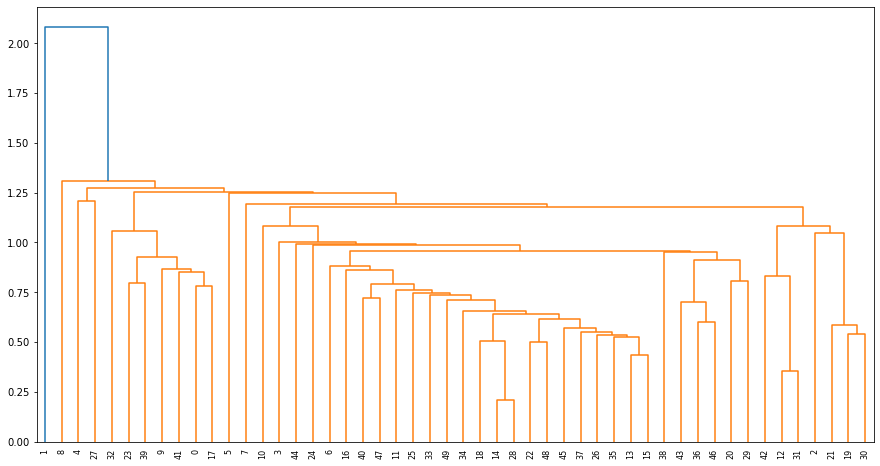

In [6]:
# create dendrogram
plt.figure(figsize = (15,8))
dendrogram = sch.dendrogram(sch.linkage(scaled_crime_df, method='single'))

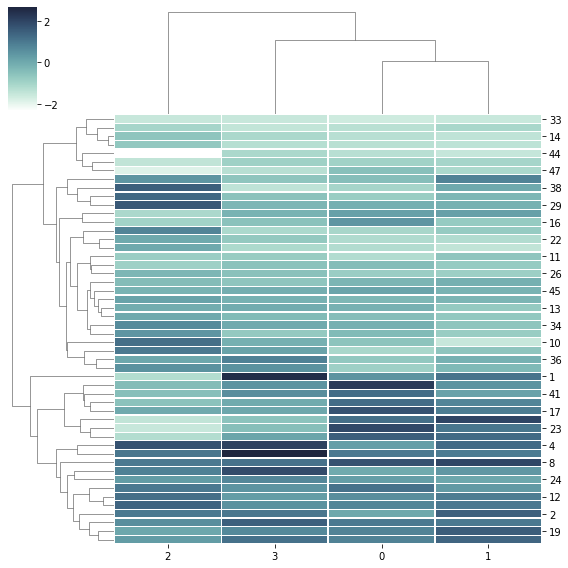

In [7]:
cmap=sn.cubehelix_palette(as_cmap = True,rot = -.3,light = 1)
sn.clustermap(scaled_crime_df,cmap=cmap,linewidths=.2,figsize=(8,8))

In [8]:
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'single')

In [9]:
# save clusters for chart
y_hc = hc.fit_predict(scaled_crime_df)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [10]:
Clusters.head()

,Clusters
0,0
1,1
2,0
3,0
4,0


In [11]:
crime['h_clusterid'] = Clusters

In [12]:
crime.groupby('h_clusterid').agg(['mean']).reset_index()

,h_clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,7.583333,165.416667,65.604167,20.525
1,1,10.000000,263.000000,48.000000,44.500
2,2,15.400000,335.000000,80.000000,31.900


we cans see there are 3 clusters:
1. Countries with medium urban population have less murder,less assault and less rape.
2. Countries with the least urban population has more murder,assault and maximum rape.
3. Countries with maximum urban population has maximum murder,max assault and more rape.

In [13]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


## K-Means clustering

In [14]:
from sklearn.cluster import KMeans

In [15]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

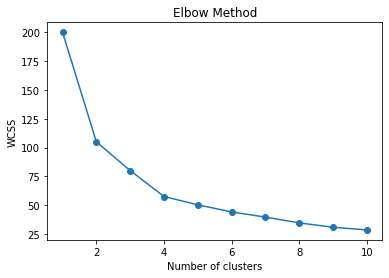

In [16]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crime_df)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(6,4))    
plt.plot(range(1, 11), wcss,marker = "o")
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
#Build Cluster algorithm
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(scaled_crime_df)

KMeans(n_clusters=3, random_state=42)

In [18]:
clusters_new.labels_

array([1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 1, 0, 1,
       2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0,
       2, 0, 0, 2, 2, 0])

In [19]:
#Assign clusters to the data set
crime['clusterid_kmeans'] = clusters_new.labels_

In [20]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 1.01513667,  1.02412028,  0.19959126,  0.85556386],
       [-0.88515915, -1.0213324 , -0.94990286, -0.92016524]])

In [21]:
crime.groupby('clusterid_kmeans').agg(['mean']).reset_index()

,clusterid_kmeans,Murder,Assault,UrbanPop,Rape,h_clusterid
,,mean,mean,mean,mean,mean
0,0,5.656250,138.875,73.875000,18.78125,0.00
1,1,12.165000,255.250,68.400000,29.16500,0.15
2,2,3.971429,86.500,51.928571,12.70000,0.00


we cans see there are 3 clusters:
1. Countries with maximum urban population have less murder,less assault and comparatively less rape.
2. Countries with medium urban population have maximum murder,max assault and max rape.
3. Countries with the least urban population have least murder and assault and least rape.


In [22]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_kmeans
0,Alabama,13.2,236,58,21.2,0,1
1,Alaska,10.0,263,48,44.5,1,1
2,Arizona,8.1,294,80,31.0,0,1
3,Arkansas,8.8,190,50,19.5,0,2
4,California,9.0,276,91,40.6,0,1
5,Colorado,7.9,204,78,38.7,0,1
6,Connecticut,3.3,110,77,11.1,0,0
7,Delaware,5.9,238,72,15.8,0,0
8,Florida,15.4,335,80,31.9,2,1
9,Georgia,17.4,211,60,25.8,0,1


## DBSCAN

In [23]:
from sklearn.cluster import DBSCAN


In [71]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(scaled_crime_df)

DBSCAN(eps=0.8, min_samples=6)

In [72]:
#Noisy samples are given the label -1.
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
        0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0],
      dtype=int64)

In [73]:
crime['cluster_db'] = dbscan.labels_
crime.groupby('cluster_db').mean()

,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_kmeans
cluster_db,,,,,,
-1,8.009524,178.904762,65.380952,21.7500,0.071429,1.095238
0,6.625000,128.000000,66.375000,18.5125,0.000000,0.250000


DBSCAN gives 2 clusters and there are some noise data points as well given by -1 labels.

<AxesSubplot:xlabel='Murder', ylabel='UrbanPop'>

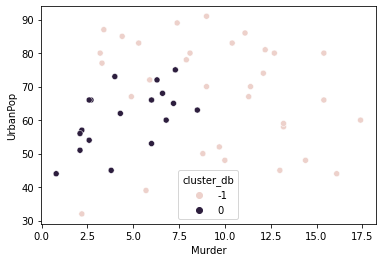

In [58]:
sn.scatterplot(data = crime,x ='Murder',y= 'UrbanPop',hue = 'cluster_db')